In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sna
df = pd.read_csv(r'C:\Users\USER\Desktop\github\NIFTY500_dataset\Dataset\001_TCS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,580.500000,592.974976,576.500000,589.299988,485.253113,2248542
1,2012-01-03,591.625000,604.950012,590.000000,598.799988,493.075714,2708884
2,2012-01-04,602.450012,602.500000,584.650024,586.500000,482.947357,2386770
3,2012-01-05,586.400024,592.500000,583.674988,586.000000,482.535645,2547312
4,2012-01-06,583.000000,594.174988,578.400024,584.700012,481.465210,2119728
...,...,...,...,...,...,...,...
2460,2021-12-27,3671.000000,3700.000000,3653.100098,3696.100098,3689.616699,1534135
2461,2021-12-28,3710.000000,3725.000000,3693.850098,3706.550049,3700.048340,1456218
2462,2021-12-29,3692.250000,3719.949951,3685.000000,3694.699951,3688.218994,1456923
2463,2021-12-30,3681.350098,3740.000000,3680.000000,3733.750000,3727.200684,1966475


In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df.isna().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


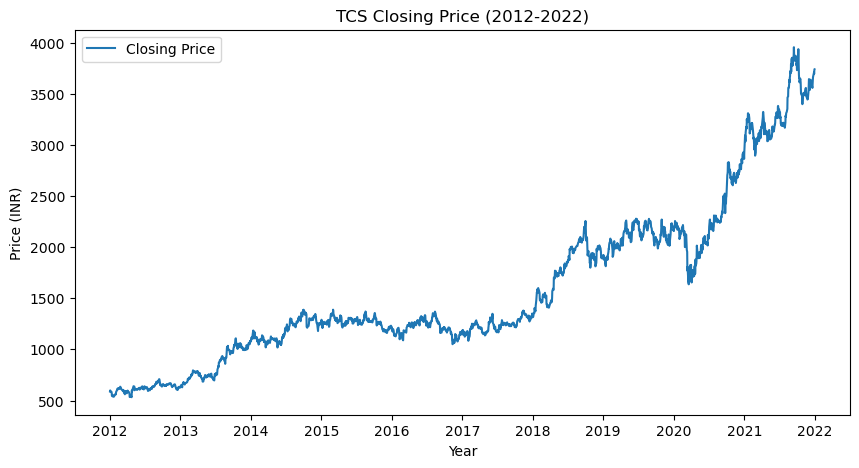

count    2465.000000
mean     1589.001613
std       787.603219
min       532.125000
25%      1118.675049
50%      1281.150024
75%      2054.050049
max      3954.550049
Name: Close, dtype: float64


In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Closing Price')
plt.title('TCS Closing Price (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()


print(df['Close'].describe())

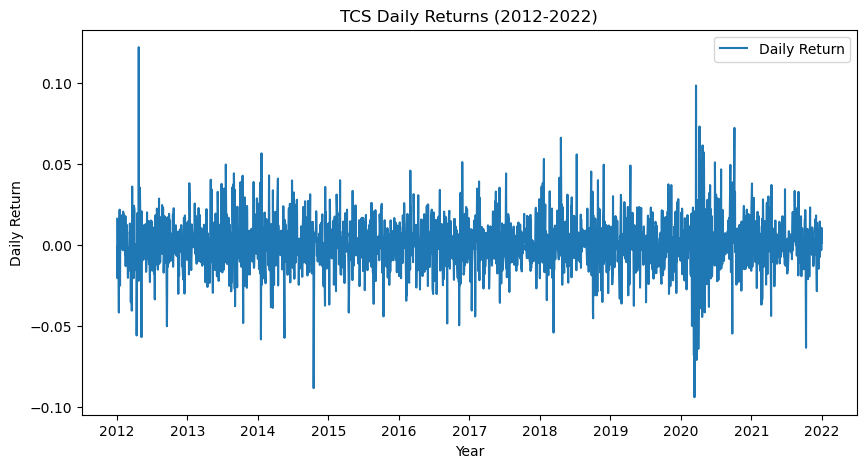

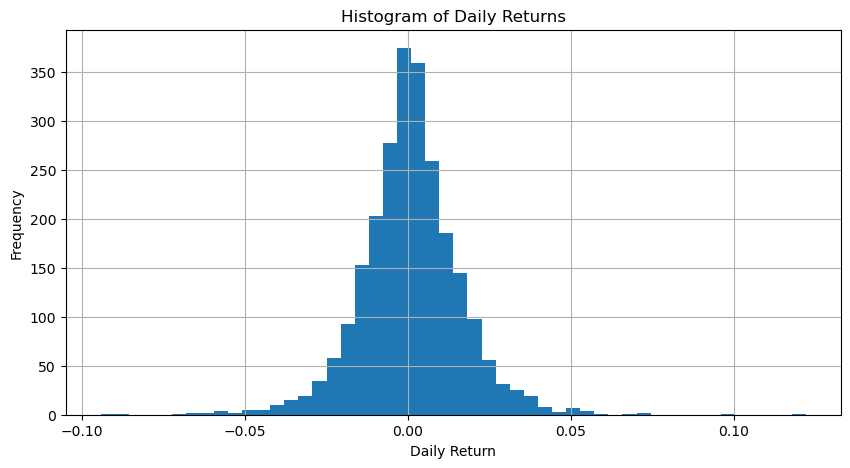

In [4]:
df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(10, 5))
plt.plot(df['Daily Return'], label='Daily Return')
plt.title('TCS Daily Returns (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

df['Daily Return'].hist(bins=50, figsize=(10, 5))
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

In [5]:
volatility = df['Daily Return'].std()
print(f'Volatility (Standard Deviation): {volatility}')

var_95 = df['Daily Return'].quantile(0.05)
print(f'Value at Risk (VaR) at 95% confidence level: {var_95}')

risk_free_rate = 0.04 / 252
sharpe_ratio = (df['Daily Return'].mean() - risk_free_rate) / volatility
print(f'Sharpe Ratio: {sharpe_ratio}')


Volatility (Standard Deviation): 0.015709891844690724
Value at Risk (VaR) at 95% confidence level: -0.023335641163803784
Sharpe Ratio: 0.04548568336173192


In [6]:
TCS_df = pd.read_csv(r'C:\Users\USER\Desktop\github\NIFTY500_dataset\Dataset\001_TCS.csv')
TCS_df['Date'] = pd.to_datetime(TCS_df['Date'])
TCS_df.set_index('Date', inplace=True)
TCS_df['Daily Return'] = TCS_df['Close'].pct_change()
nifty_df = pd.read_csv(r'C:\Users\USER\Downloads\archive\NIFTY 50.csv')
nifty_df['Date'] = pd.to_datetime(nifty_df['Date'])
nifty_df.set_index('Date', inplace=True)
nifty_df['Daily Return'] = nifty_df['Close'].pct_change()
aligned_data = TCS_df['Daily Return'].align(nifty_df['Daily Return'], join='inner')
cov_matrix = aligned_data[0].cov(aligned_data[1])
market_var = aligned_data[1].var()
beta = cov_matrix / market_var
print(f'Beta of TCS: {beta}')


Beta of TCS: 0.588256947031973


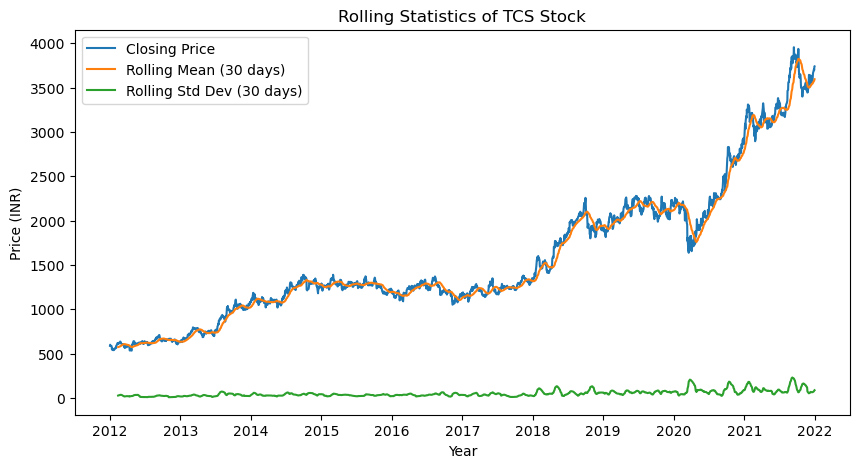

In [7]:
df['Rolling Mean'] = df['Close'].rolling(window=30).mean()
df['Rolling Std Dev'] = df['Close'].rolling(window=30).std()
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Closing Price')
plt.plot(df['Rolling Mean'], label='Rolling Mean (30 days)')
plt.plot(df['Rolling Std Dev'], label='Rolling Std Dev (30 days)')
plt.title('Rolling Statistics of TCS Stock')
plt.xlabel('Year')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()


In [9]:
df.to_csv('TCS_Risk_Analysis.csv')